In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,StackingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score,accuracy_score,roc_auc_score,f1_score

from sklearn.svm import SVC
from xgboost import XGBClassifier
# from mlxtend.classifier import StackingClassifier
import random


In [2]:
df = pd.read_csv('final_data.csv')

In [3]:
df.sample(10)

,Unnamed: 0,ID,time,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,...,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,mood_class
1184,1184,14.31,2014-05-12,7.0,1.666308,0.721356,-0.841009,-1.271480,-0.173998,-0.295773,...,-0.584370,-0.213942,-0.165525,-0.432365,-0.638464,-0.274211,-0.392016,-0.317412,-0.628896,1
415,415,14.12,2014-04-21,6.0,-0.220617,0.145647,-0.484963,-0.357633,-0.413356,-0.511811,...,-0.584370,-0.317515,-0.165525,-0.311262,0.391078,-0.090484,-0.286440,-0.297284,1.074913,1
899,899,14.25,2014-04-29,6.0,-1.654681,-2.963183,-0.349314,1.108194,2.279429,4.889121,...,-0.584370,0.419033,-0.165525,0.337377,-0.295969,-0.241293,-0.392016,0.001253,0.089874,1
1203,1203,14.32,2014-04-16,8.5,1.288923,0.145647,0.189426,-0.352458,1.381834,-0.511811,...,-0.254458,-0.189439,-0.165525,-0.305320,-0.439620,0.264115,-0.324523,-0.317412,-0.423108,2
582,582,14.16,2014-03-13,8.0,-0.598003,1.872774,-0.534985,-1.226828,0.783437,-0.511811,...,-0.584370,-0.437693,-0.163836,-0.420592,-0.622553,-0.274211,-0.392016,-0.317412,-0.628896,2
576,576,14.15,2014-05-02,7.0,0.458676,-0.430063,-1.233196,-1.271480,0.185040,-0.511811,...,-0.584370,-0.213942,-0.165525,-0.432365,-0.638464,-0.274211,-0.392016,-0.317412,-0.628896,1
408,408,14.12,2014-04-14,6.6,-0.447049,0.260788,-0.301787,0.424122,-0.413356,-0.511811,...,-0.307666,-0.437693,-0.165525,-0.234064,1.128723,-0.274211,-0.362414,-0.250434,0.308845,1
1117,1117,14.30,2014-04-08,7.8,-0.748957,0.721356,0.461015,2.214899,-0.712555,-0.511811,...,-0.155574,2.453423,-0.165525,1.635482,0.109208,-0.267566,-0.379319,0.844055,-0.628896,2
1030,1030,14.28,2014-04-12,7.8,-0.975388,1.297065,-0.836950,1.213894,-0.712555,-0.511811,...,-0.001426,1.498952,0.307496,-0.238026,1.172265,-0.274211,-0.074675,6.046132,1.078500,2
860,860,14.24,2014-05-22,6.6,1.062492,0.260788,-0.784278,-0.623851,-0.413356,0.568376,...,0.058453,-0.332547,-0.091994,-0.236818,-0.618487,-0.274211,-0.392016,-0.317412,-0.129429,1


In [4]:
df.info

<bound method DataFrame.info of       Unnamed: 0     ID        time      mood  circumplex.arousal  \
0              0  14.01  2014-02-26  6.250000           -0.220617   
1              1  14.01  2014-02-27  6.333333            0.156768   
2              2  14.01  2014-03-21  6.200000            0.458676   
3              3  14.01  2014-03-22  6.400000            1.062492   
4              4  14.01  2014-03-23  6.800000            0.458676   
...          ...    ...         ...       ...                 ...   
1263        1263  14.33  2014-05-27  6.200000           -0.748957   
1264        1264  14.33  2014-05-28  8.200000            0.156768   
1265        1265  14.33  2014-05-29  7.000000           -1.855953   
1266        1266  14.33  2014-05-30  6.800000           -1.050865   
1267        1267  14.33  2014-05-31  7.000000           -2.862313   

      circumplex.valence  activity    screen      call       sms  ...  \
0               0.145647 -0.650267 -0.652424 -0.413356  0.568376  

In [5]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1268.0,NaN,NaN,NaN,633.5,366.18438,0.0,316.75,633.5,950.25,1267.0
ID,1268.0,NaN,NaN,NaN,14.171798,0.097925,14.01,14.08,14.16,14.26,14.33
time,1268,98,2014-04-16,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mood,1268.0,NaN,NaN,NaN,6.990063,0.736465,3.0,6.6,7.0,7.5,9.333333
circumplex.arousal,1268.0,NaN,NaN,NaN,-0.0,1.000395,-2.862313,-0.748957,0.156768,0.760584,3.175848
circumplex.valence,1268.0,NaN,NaN,NaN,0.0,1.000395,-4.460027,-0.660346,0.260788,0.721356,3.024192
activity,1268.0,NaN,NaN,NaN,0.0,1.000395,-1.233196,-0.655133,-0.231947,0.289247,4.620377
screen,1268.0,NaN,NaN,NaN,-0.0,1.000395,-1.27148,-0.751709,-0.197766,0.506542,6.564261
call,1268.0,NaN,NaN,NaN,-0.0,1.000395,-0.712555,-0.712555,-0.413356,0.18504,8.562594
sms,1268.0,NaN,NaN,NaN,-0.0,1.000395,-0.511811,-0.511811,-0.511811,0.028282,8.669773


In [6]:
missing_data_sum = df.isnull().sum()
missing_data = pd.DataFrame({'total_missing_values': missing_data_sum,'percentage_of_missing_values': (missing_data_sum/df.shape[0])*100})
missing_data[1:]

,total_missing_values,percentage_of_missing_values
ID,0,0.0
time,0,0.0
mood,0,0.0
circumplex.arousal,0,0.0
circumplex.valence,0,0.0
activity,0,0.0
screen,0,0.0
call,0,0.0
sms,0,0.0
appCat.builtin,0,0.0


In [7]:
def is_weekend(date):
    return int(date.weekday() >= 5)

In [8]:
data=df

In [9]:
data['time'] = pd.to_datetime(data['time'])
data['weekend'] = data['time'].apply(is_weekend)

In [10]:
random.seed(42)
np.random.seed(42)
feature = data.drop(columns=['mood','time'])  # feature of dataset
label = data['mood']  # label
#using  stratify=label to handle class imbalance
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2,stratify=label)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [19]:
random.seed(42)
np.random.seed(42)
feature = data.drop(columns=['mood','time'])  # feature of dataset
label = data['mood']  # label
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1571020802736026


In [20]:
label.info

<bound method Series.info of 0       6.250000
1       6.333333
2       6.200000
3       6.400000
4       6.800000
          ...   
1263    6.200000
1264    8.200000
1265    7.000000
1266    6.800000
1267    7.000000
Name: mood, Length: 1268, dtype: float64>

In [21]:
random.seed(42)
np.random.seed(42)
# 初始化并训练随机森林回归模型
model = RandomForestRegressor()

# 定义参数空间
param_grid = {
    'bootstrap': [True],
    'n_estimators': range(1,101,10),
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

# 初始化 GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,)

grid_search.fit(X_train, y_train.values.ravel())
t_pred = grid_search.best_estimator_.predict(X_test)

# 计算预测结果与真实标签之间的均方误差
MSE = mean_squared_error(y_test, t_pred)

print("Mean Squared Error:", MSE)

Mean Squared Error: 0.14206766847201222


In [22]:
random.seed(42)
np.random.seed(42)
# 初始化并训练随机森林回归模型
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Feature selection based on feature importances
sfm = SelectFromModel(model, threshold='median')  # Select features with importance above median
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)
# 定义参数空间
param_grid = {
    'bootstrap': [True],
    'n_estimators': range(1,101,10),
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

# 初始化 GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,)

grid_search.fit(X_train, y_train.values.ravel())
t_pred = grid_search.best_estimator_.predict(X_test)

# 计算预测结果与真实标签之间的均方误差
MSE = mean_squared_error(y_test, t_pred)

print("Mean Squared Error:", MSE)



Mean Squared Error: 0.14127445504961156


In [23]:
random.seed(42)
np.random.seed(42)
# Compute permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importance scores
feature_importance = perm_importance.importances_mean

# Sort feature importance scores and select features above a certain threshold
threshold = 0.0  # You can adjust the threshold based on your preference
selected_features = X_train.columns[feature_importance > threshold]

# Subset the training and testing sets with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
param_grid = {
    'bootstrap': [True],
    'n_estimators': range(1,101,10),
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

# Initialize GridSearchCV with RandomForestRegressor
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,)

# Fit GridSearchCV using selected features
grid_search.fit(X_train_selected, y_train)
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on test set
t_pred = grid_search.best_estimator_.predict(X_test_selected)

# Calculate mean squared error
MSE = mean_squared_error(y_test, t_pred)

print("Mean Squared Error:", MSE)

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 41}
Mean Squared Error: 0.13836315499428267


In [24]:
random.seed(42)
np.random.seed(42)
# Combine training and testing features
X_adv = np.vstack((X_train, X_test))

# Create labels: 0 for training set, 1 for testing set
y_adv = np.hstack((np.zeros(len(X_train)), np.ones(len(X_test))))

# Initialize and train a classifier
adv_model = RandomForestClassifier()
adv_model.fit(X_adv, y_adv)

# Predict probabilities for belonging to the testing set
adv_probs = adv_model.predict_proba(X_adv)[:, 1]

# Calculate AUC score to assess similarity between sets
adv_auc = roc_auc_score(y_adv, adv_probs)
print("Adversarial AUC Score:", adv_auc)

Adversarial AUC Score: 1.0


In [25]:
correlation_matrix = data.corr()

# Extract correlations between features and target variable
correlations_with_target = correlation_matrix['mood'].drop('mood')  #'mood' is the target variable

# Print correlation coefficients
print("Correlation with target variable:")
print(correlations_with_target)

Correlation with target variable:
Unnamed: 0              0.170609
ID                      0.169282
time                    0.003664
circumplex.arousal      0.152953
circumplex.valence      0.684364
activity                0.172094
screen                  0.044452
call                    0.031858
sms                    -0.017278
appCat.builtin         -0.047249
appCat.communication    0.053590
appCat.entertainment    0.106937
appCat.finance         -0.015219
appCat.game             0.063959
appCat.office           0.030176
appCat.other            0.083313
appCat.social          -0.045887
appCat.travel           0.031240
appCat.unknown          0.037272
appCat.utilities        0.033582
appCat.weather         -0.024276
mood_class              0.739938
weekend                 0.107089
Name: mood, dtype: float64


In [36]:
random.seed(42)
np.random.seed(42)
data['mood_class'] = data['mood'].apply(lambda x: 0 if x <= 4 else (1 if 5 <= x <= 7 else 2))
feature = data.drop(['mood', 'time', 'mood_class'], axis=1)
label = data['mood_class']

label_counts = label.value_counts()

# Print the number of occurrences of each label class
print("Number of occurrences of each label class:")
print(label_counts)

# feature 
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2)

model = RandomForestClassifier()

# Perform 5-fold cross-validation and calculate accuracy scores
accuracy_scores = cross_val_score(model, X_train, y_train, cv=5)

# Print cross-validation accuracy scores
print("Cross-validation Accuracy Scores:", accuracy_scores)

# Calculate the mean accuracy score
mean_accuracy = accuracy_scores.mean()
print("Mean Accuracy:", mean_accuracy)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate F1-score for each class
f1_scores = f1_score(y_test, y_pred, average=None)

# Print F1-score for each class
print("F1-score for each class:", f1_scores)

# Calculate overall F1-score (macro average)
macro_f1 = f1_score(y_test, y_pred, average='macro')
print("Overall F1-score (macro average):", macro_f1)

# Calculate overall F1-score (weighted average)
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print("Overall F1-score (weighted average):", weighted_f1)

Number of occurrences of each label class:
mood_class
1    707
2    554
0      7
Name: count, dtype: int64
Cross-validation Accuracy Scores: [0.70935961 0.73891626 0.70935961 0.71921182 0.73267327]
Mean Accuracy: 0.7219041115934253
Accuracy: 0.7795275590551181
F1-score for each class: [0.         0.80821918 0.74418605]
Overall F1-score (macro average): 0.5174684081979398
Overall F1-score (weighted average): 0.7765500322335464


In [27]:
random.seed(42)
np.random.seed(42)
# Train your classification model (Random Forest in this case)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Calculate permutation importance using the original test set
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10)

# Get feature importance scores
feature_importance = perm_importance.importances_mean

# Print feature importance scores
for i, (feat, importance) in enumerate(zip(X_test.columns, feature_importance)):
    print(f"Feature {i+1}: {feat}, Importance: {importance}")

# Sort feature importance scores and select features above a certain threshold
threshold = 0.0  # You can adjust the threshold based on your preference
selected_features = X_train.columns[feature_importance > threshold]

# Subset the training and testing sets with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Perform 5-fold cross-validation and calculate accuracy scores
accuracy_scores = cross_val_score(model, X_train_selected, y_train, cv=5)

# Print cross-validation accuracy scores
print("Cross-validation Accuracy Scores:", accuracy_scores)

# Calculate the mean accuracy score
mean_accuracy = accuracy_scores.mean()
print("Mean Accuracy:", mean_accuracy)
# Train the model using selected features
model.fit(X_train_selected, y_train)

# Predict on the test set using selected features
y_pred = model.predict(X_test_selected)

# Calculate accuracy using the test set with selected features
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with selected features:", accuracy)


Feature 1: Unnamed: 0, Importance: 0.030708661417322813
Feature 2: ID, Importance: 0.027559055118110198
Feature 3: circumplex.arousal, Importance: 0.008267716535433057
Feature 4: circumplex.valence, Importance: 0.134251968503937
Feature 5: activity, Importance: 0.005511811023622038
Feature 6: screen, Importance: -0.004330708661417315
Feature 7: call, Importance: 0.0031496062992125927
Feature 8: sms, Importance: 0.003937007874015741
Feature 9: appCat.builtin, Importance: 0.0015748031496062964
Feature 10: appCat.communication, Importance: 0.004330708661417315
Feature 11: appCat.entertainment, Importance: -0.010236220472440938
Feature 12: appCat.finance, Importance: 0.003543307086614167
Feature 13: appCat.game, Importance: -0.0094488188976378
Feature 14: appCat.office, Importance: 0.009448818897637778
Feature 15: appCat.other, Importance: -0.0015748031496062964
Feature 16: appCat.social, Importance: 0.007086614173228334
Feature 17: appCat.travel, Importance: 0.004724409448818889
Feature 1

In [32]:
random.seed(42)
np.random.seed(42)

# Train the model using selected features
param_grid = {
    'n_estimators': range(100,201,10),
    # 'max_depth': None,
    'criterion':['gini', 'entropy'],
    'min_samples_split':[2,3,5,10],
    'min_samples_leaf':[1,2,3,4],
    'max_features':['log2', 'sqrt']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train_selected, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on the test set using selected features
y_pred = grid_search.predict(X_test_selected)

# Calculate accuracy using the test set with selected features
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with selected features:", accuracy)


Best Parameters: {'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 110}
Accuracy with selected features: 0.7992125984251969


In [39]:
random.seed(42)
np.random.seed(42)
# Initialize base models
base_models = [
    ('svm', SVC()),
    ('xgb', XGBClassifier())
]

# Initialize stacking classifier with base models and a meta-model
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Define parameter grid for hyperparameter optimization
param_grid = {
    'svm__C': [0.1, 1, 10],
    'xgb__n_estimators': [50, 100, 200],
    'final_estimator__C': [0.1, 1, 10],
}

grid_search = GridSearchCV(
    estimator=stacking_classifier, 
    param_grid=param_grid, 
    cv=3,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy as the evaluation metric
)
grid_search.fit(X_train_selected, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# # Train stacking classifier
# stacking_classifier.fit(X_train_selected, y_train)

# # Make predictions
# y_pred = stacking_classifier.predict(X_test_selected)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

/Users/minami/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/minami/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/minami/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/minami/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/minami/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=

KeyboardInterrupt: 

In [22]:
activity=df[df['variable']=='activity']
activity.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,22965.0,NaN,NaN,NaN,28410.0,6629.568802,16928.0,22669.0,28410.0,34151.0,39892.0
id,22965,27,AS14.24,1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,22965,1982,2014-04-17 21:00:00.000,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable,22965,1,activity,22965,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value,22965.0,NaN,NaN,NaN,0.115958,0.186946,0.0,0.0,0.021739,0.158333,1.0


In [23]:
circumplex_arousal=df[df['variable']=='circumplex.arousal']
activity.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,22965.0,NaN,NaN,NaN,28410.0,6629.568802,16928.0,22669.0,28410.0,34151.0,39892.0
id,22965,27,AS14.24,1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,22965,1982,2014-04-17 21:00:00.000,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable,22965,1,activity,22965,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value,22965.0,NaN,NaN,NaN,0.115958,0.186946,0.0,0.0,0.021739,0.158333,1.0


In [24]:
mood=df[df['variable']=='mood']
activity.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,22965.0,NaN,NaN,NaN,28410.0,6629.568802,16928.0,22669.0,28410.0,34151.0,39892.0
id,22965,27,AS14.24,1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,22965,1982,2014-04-17 21:00:00.000,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable,22965,1,activity,22965,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value,22965.0,NaN,NaN,NaN,0.115958,0.186946,0.0,0.0,0.021739,0.158333,1.0


In [25]:
circumplex_valence=df[df['variable']=='circumplex.valence']
activity.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,22965.0,NaN,NaN,NaN,28410.0,6629.568802,16928.0,22669.0,28410.0,34151.0,39892.0
id,22965,27,AS14.24,1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,22965,1982,2014-04-17 21:00:00.000,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable,22965,1,activity,22965,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value,22965.0,NaN,NaN,NaN,0.115958,0.186946,0.0,0.0,0.021739,0.158333,1.0


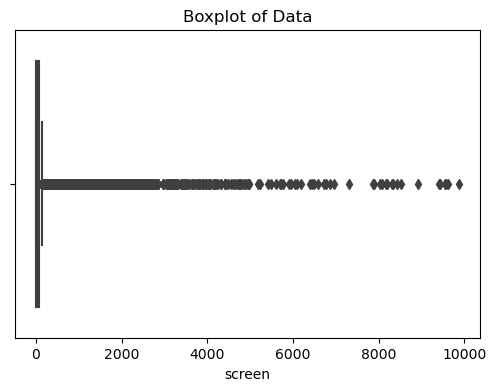

In [20]:
screen=df[df['variable']=='screen']
plt.figure(figsize=(6, 4))
sns.boxplot(x='value', data=df[df['variable'] == 'screen'])
plt.title('Boxplot of Data')
plt.xlabel('screen')
plt.show()

In [1]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/03/e6/4aef6799badc2693548559bad5b56d56cfe89eada337c815fdfe92175250/xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
